(60000, 28, 28, 1)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None,

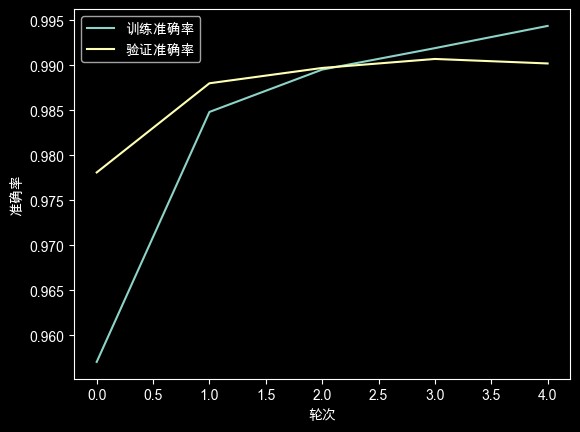

In [9]:
# MNIST数据集实例
import tensorflow as tf
from keras import Input, layers
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'Arial Unicode MS' # 设置字体

# 加载MNIST数据集
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 数据预处理
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 数据重塑
x_train = x_train.reshape((-1, 28, 28, 1))  # 添加通道维度
x_test = x_test.reshape((-1, 28, 28, 1))

print(x_train.shape)

# 构建CNN模型
model = tf.keras.models.Sequential([
   Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(), # 将多维输入一维化
    layers.Dense(64, activation='relu'), # 全连接层
    layers.Dense(10, activation='softmax') # 输出层 返回的的概率分布
])

# 编译模型
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 查看模型结构
model.summary()

# 模型训练
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test),verbose=1)

# 模型评估
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"测试集上的准确率: {test_acc:.4f}")

# 可视化训练过程
plt.plot(history.history['accuracy'], label='训练准确率')
plt.plot(history.history['val_accuracy'], label='验证准确率')
plt.xlabel('轮次')
plt.ylabel('准确率')
plt.legend()
plt.show()

313/313 [==============================] - 0s 829us/step
Predicted label: 7
True label: 7


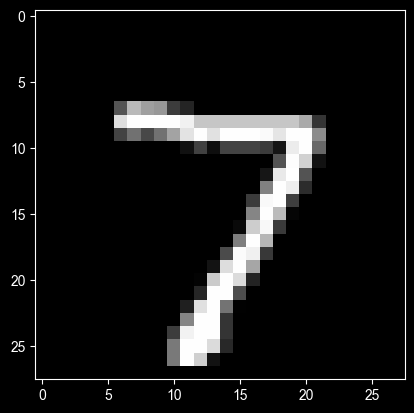

In [10]:
# 预测 MNIST 测试
# 预测测试集中的一张图片
predictions = model.predict(x_test)
# 显示第一个预测结果
print(f"Predicted label: {predictions[0].argmax()}")
print(f"True label: {y_test[0]}")
# 显示第一张图片
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.show()

In [21]:
# Fashion 时装数据集
# 1,加载Fashion MINIST数据集
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_train[0], x_train[0].shape)
print(y_train, y_train.shape)
# 2,数据预处理
x_train = x_train / 255.0 # 归一化
x_test = x_test / 255.0 # 归一化
print(x_train[0], x_train[0].shape)
# 将数据重塑为 (样本数, 高, 宽, 通道数) 的形状
print(x_train, x_train.shape)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print(x_train, x_train.shape)
# 3,构建CNN模型
model = tf.keras.models.Sequential([
Input(shape=(28, 28, 1)),
layers.Conv2D(32, (3, 3), activation='relu'), # 第一卷积层，卷积核大小3x3，滤波器数为32，ReLU激活函数
layers.MaxPooling2D((2, 2)), # 第一池化层，2x2最大池化
layers.Conv2D(64, (3, 3), activation='relu'), # 第二卷积层，卷积核大小3x3，滤波器数为64，ReLU激活函数
layers.MaxPooling2D((2, 2)), # 第二池化层，2x2最大池化
layers.Conv2D(128, (3, 3), activation='relu'), # 第三卷积层，卷积核大小3x3，滤波器数为64，ReLU激活函数
layers.MaxPooling2D((2, 2)), # 第三池化层，2x2最大池化
layers.Flatten(), # 展平层 将二维特征图展平为一维
# 在训练阶段随机的丢弃一些神经元 避免过拟合 加在全连接层之前
layers.Dropout(0.5), # Dropout层，丢弃率为50
layers.Dense(512, activation='relu'), # 全连接层，512个神经元，ReLU激活函数
layers.Dense(10, activation='softmax') # 输出层，10个神经元（对应数字0-9），softmax激活函数
])
# 4,模型编译
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']
)
# 5,模型训练
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test,
y_test), verbose=1)
# 6,模型评估
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0 

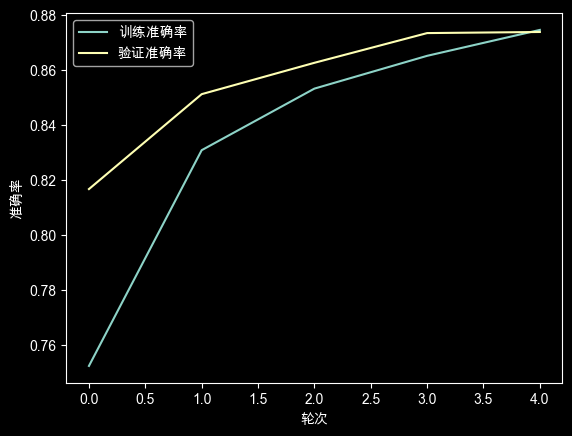

In [22]:
# 7,可视化训练过程
# 设置matplotlib使用黑体显示中文
plt.rcParams['font.family'] = 'Arial Unicode MS' # 设置字体
plt.plot(history.history['accuracy'], label='训练准确率')
plt.plot(history.history['val_accuracy'], label='验证准确率')
plt.xlabel('轮次')
plt.ylabel('准确率')
plt.legend()
plt.show() # 验证很差 说明过拟合

313/313 [==============================] - 0s 1ms/step
Predicted label: 9
True label: 9


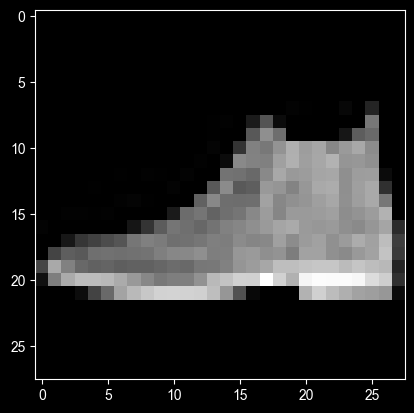

In [20]:
# 查看预测结果
predictions = model.predict(x_test)
# 显示第一个预测结果
print(f"Predicted label: {predictions[0].argmax()}")
print(f"True label: {y_test[0]}")
# 显示第一张图片
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.show()  # 第九类（下标从 0 开始)是裸靴